# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [188]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [189]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [190]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [191]:
# Shape
df_dsa.shape

(9700, 11)

In [192]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [193]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [194]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [195]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [196]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [197]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [198]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [199]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [200]:
df_dsa_p1=df_dsa[df_dsa["Categoria"]=="Office Supplies"]
df_dsa_p1_total = df_dsa_p1.groupby(["Cidade" ])["Valor_Venda"].sum()
cidade_maior_venda = df_dsa_p1_total.idxmax()

print(cidade_maior_venda)


New York City




### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

<AxesSubplot:xlabel='Data_Pedido'>

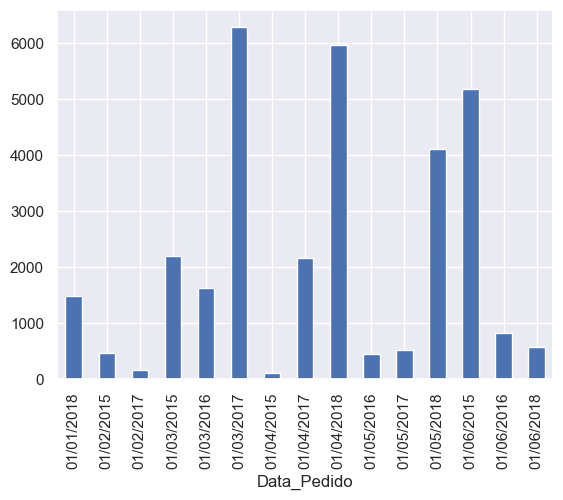

In [201]:
df_dsa_totalvendasporpedido = df_dsa.groupby(["Data_Pedido"])["Valor_Venda"].sum()

df_dsa_totalvendasporpedido.head(15).plot(kind='bar', x='Datas', y='Vendas')


In [202]:
print(df_dsa.dtypes)

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object




### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

28106.716

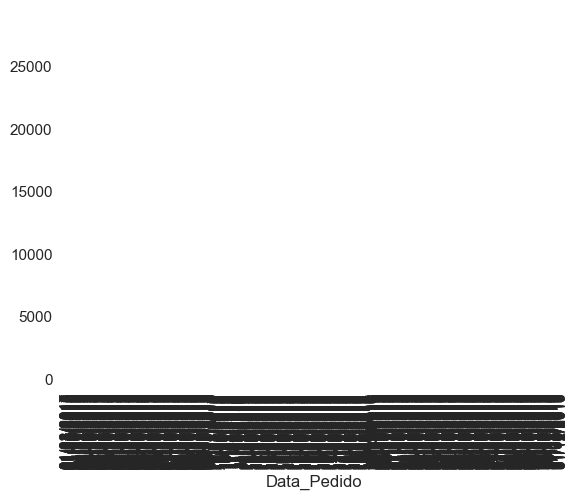

In [203]:
df_dsa_totalvendasestados = df_dsa.groupby(["Estado"])["Valor_Venda"].sum().reset_index()
df_dsa_totalvendasporpedido.plot(kind='bar', x='Datas', y='Vendas')
df_dsa_totalvendasporpedido.max()



### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

<AxesSubplot:xlabel='Cidade'>

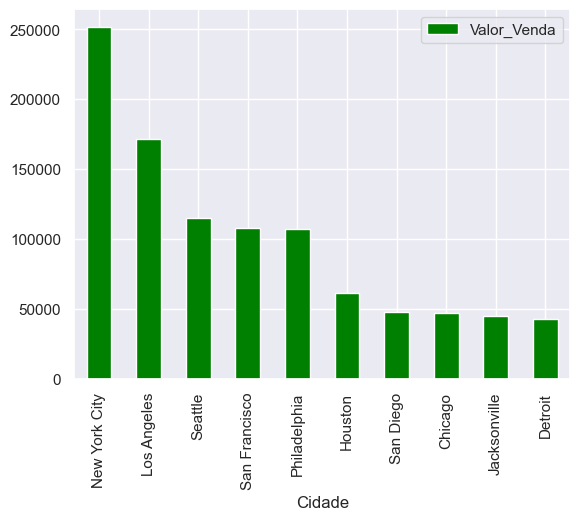

In [204]:
topcidadesvenda = df_dsa.groupby(["Cidade"])["Valor_Venda"].sum().reset_index()
topcidadesvenda_ordenado = topcidadesvenda.sort_values(by=['Valor_Venda'],ascending=False)
top10 = topcidadesvenda_ordenado.head(10)
top10.plot(kind='bar', x='Cidade', y='Valor_Venda',color='green')



### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [205]:
dados = df_dsa.loc[:, ['Segmento', 'Valor_Venda']].head(3)
segmento_maior_venda = df_dsa.groupby(["Segmento"])["Valor_Venda"].sum().reset_index()
segmento_maior_venda1=segmento_maior_venda.sort_values(by=['Valor_Venda'],ascending=False)
segmento_maior_venda

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [206]:
#Transformando os dados em valores absolutos
def autopct_format (values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '$ {v:d}'.format(v = val)
    return my_format

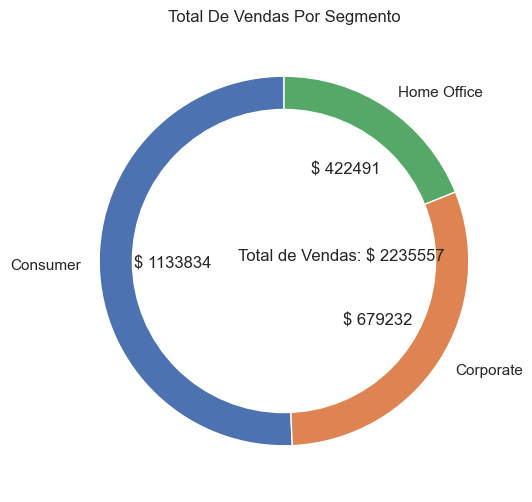

In [207]:
#Plot

plt.figure(figsize=(16,6))

plt.pie(segmento_maior_venda['Valor_Venda'],
       labels=segmento_maior_venda["Segmento"],
       autopct=autopct_format(segmento_maior_venda['Valor_Venda']),
       startangle=90)

#Limpeza Gráfico
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

#Labels e anotacoes 

plt.annotate(text='Total de Vendas: ' + '$ ' + str(int(sum(segmento_maior_venda['Valor_Venda']))),xy=(-0.25, 0))
plt.title('Total De Vendas Por Segmento')
plt.show()



### Qual o Total de Vendas Por Segmento e Por Ano?

In [208]:
df_dsa.head(3)


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62


In [209]:
df_dsa['Data_Pedido']=pd.to_datetime(df_dsa['Data_Pedido'],dayfirst= True)

In [210]:
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [211]:
#Após transformar Data pedido em Datetime, criaremos a coluna ANO
df_dsa['Ano']=df_dsa['Data_Pedido'].dt.year

In [212]:
agrupamento_segmento_ano = df_dsa.groupby(["Segmento","Ano"])["Valor_Venda"].sum().reset_index()
agrupamento_segmento_ano

,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332




Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [213]:
df_dsa['Desconto']=np.where(df_dsa['Valor_Venda'] >1000,0.15,0.10)
df_dsa.sort_values(by=['Valor_Venda'])
df_dsa['Desconto'].value_counts()
print('457 vendas receberam desconto de 15%')

457 vendas receberam desconto de 15%




### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [214]:
df_dsa['Valor_com_Desconto'] = (1-df_dsa['Desconto'])*df_dsa['Valor_Venda']
venda_antes_desconto = df_dsa.loc[df_dsa['Desconto']==0.15, ['Valor_Venda']]
venda_depois_desconto = df_dsa.loc[df_dsa['Desconto']==0.15, ['Valor_com_Desconto']]


print('O valor com desconto tem uma média de : {}'.format(venda_depois_desconto['Valor_com_Desconto'].mean()))
print('O valor sem desconto tem uma média de : {}'.format(venda_antes_desconto['Valor_Venda'].mean()))

O valor com desconto tem uma média de : 1799.2866430196952
O valor sem desconto tem uma média de : 2116.8078153172864



### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

### Demonstre o resultado através de gráfico de linha.

In [222]:
# Extraímos o mês e gravamos em uma nova variável
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month


In [223]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_agrupamento = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [224]:
# Extrair os níveis
anos = df_agrupamento.index.get_level_values(0)
meses = df_agrupamento.index.get_level_values(1)
segmentos = df_agrupamento.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

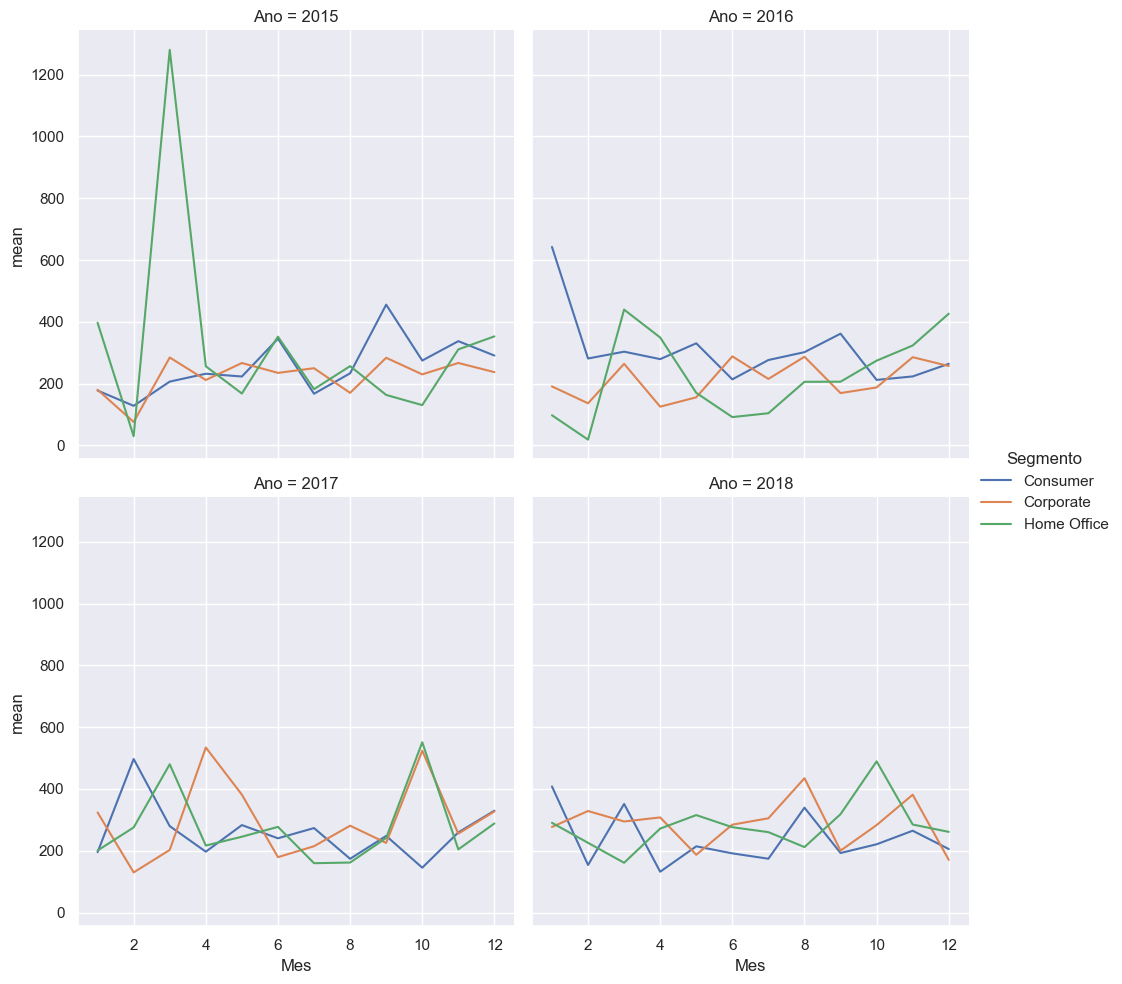

In [225]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_agrupamento, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 2)
plt.show()


### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [241]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
df_dsa_agrupamento = df_dsa.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [242]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_dsa_agrupamento = df_dsa_agrupamento[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [243]:
# Dataframe com categorias e subcategorias
df_dsa_agrupamento

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [247]:
# Criamos outro dataframe somente com os totais por categoria
df_dsa_agrupamento_cat = df_dsa_agrupamento.groupby('Categoria').sum(numeric_only = True).reset_index()

In [249]:
# Dataframe com categorias 
df_dsa_agrupamento_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [252]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [253]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

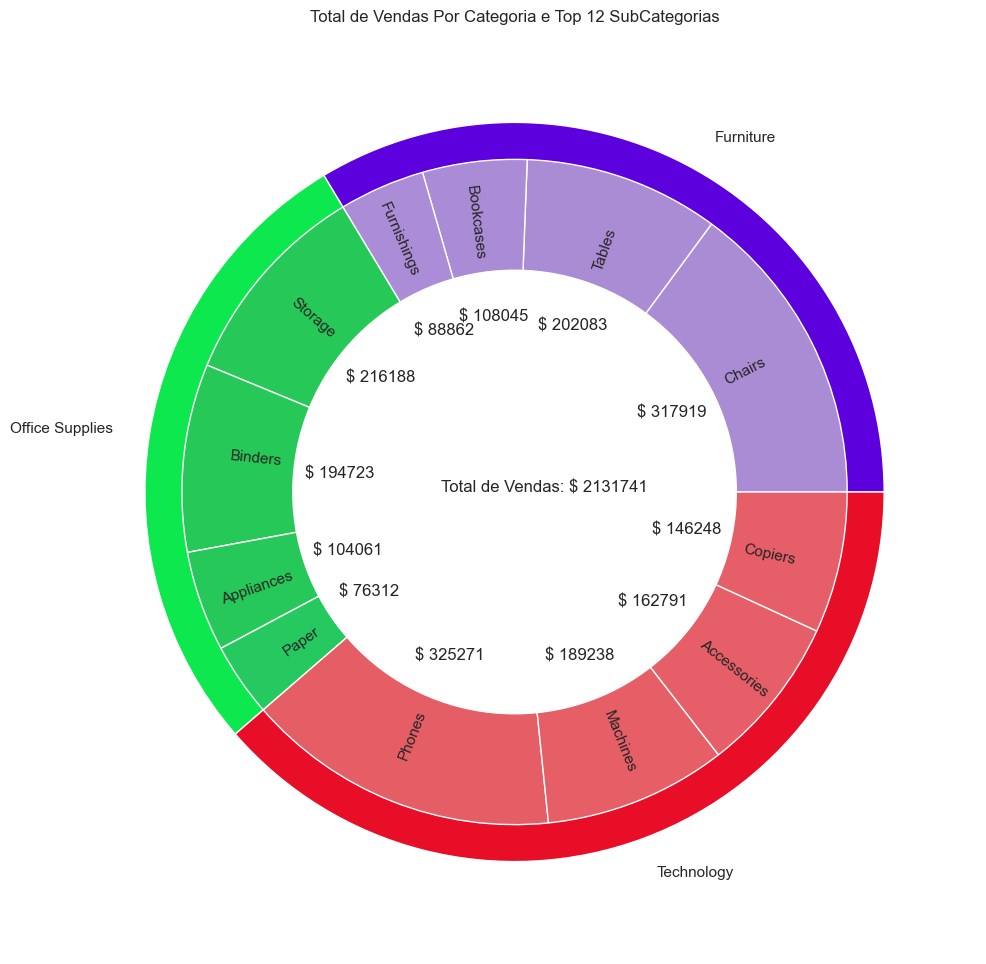

In [254]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_agrupamento_cat['Valor_Venda'], 
            radius = 1,
            labels = df_dsa_agrupamento_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_agrupamento['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategoria'],
            autopct = autopct_format(df_dsa_p10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_agrupamento['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()